#### 4) Image Resolution. (30 points)
a. Reduce the resolution of 1_3.asc by a factor of 4 in both horizontal and vertical dimensions (e.g., if the original image is 400 by 400, then result shall be 100 by 100) to create a decimated image using two different methods:
* i. Keep one pixel out of every 4x4 pixel area. Display the resulting image Y1.
* ii. Replace every 4x4 pixel area in 1_3.asc by the average value of the pixel values in that region. Display the resulting image Y2.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
img_filepath = '/home/ngtuetam/workspace/DIP_2022/assignment_1/data/1_3.asc'

In [3]:
def resolute_image_a1(image):
    """
    Reduce the resolution of image by a factor of 4 in both horizontal and vertical dimensions. 
    Keep one pixel out of every 4x4 pixel area.
    
    Args:
        image (np.array): input image as numpy array
        
    Returns:
        resoluted_img (np.array): resoluted image
    """
    resoluted_img = image[::4, ::4]
    return resoluted_img
    

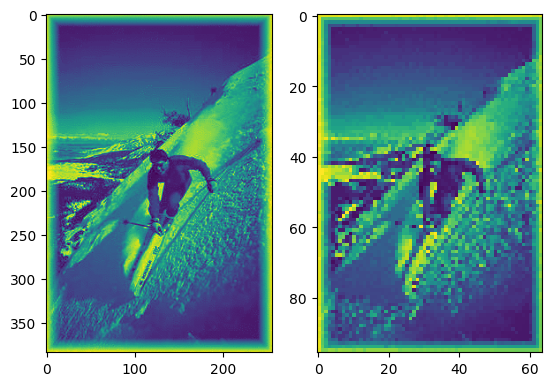

In [5]:
image = np.loadtxt(img_filepath)
Y1 = resolute_image_a1(image)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(Y1)

In [6]:
def resolute_image_a2(image):
    """
    Reduce the resolution of image by a factor of 4 in both horizontal and vertical dimensions. 
    Replace every 4x4 pixel area by the average value of the pixel values in that region.
    
    Args:
        image (np.array): input image as numpy array
        
    Returns:
        resoluted_img (np.array): resoluted image
    """
    imgsize = image.shape
    x,y = imgsize[:2]
    resoluted_img = np.zeros((int(x/4),int(y/4)))
    for i in range(0,x,4):
        for j in range(0,y,4):
            cropped_img = image[i:i+4, j:j+4]
            avg = np.average(cropped_img)
            row, col = int(i/4), int(j/4)
            resoluted_img[row][col] = avg
            
    return resoluted_img

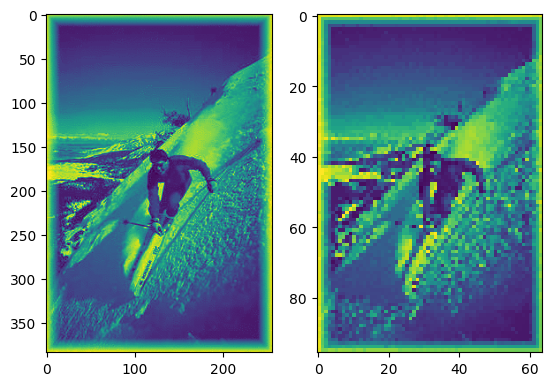

In [7]:
image = np.loadtxt(img_filepath)
Y2 = resolute_image_a1(image)

plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(Y2)

In [8]:
np.savetxt('y1_result.asc',Y1)

In [9]:
np.savetxt('y2_result.asc',Y2)


b. Enlarge Image Y1 by a factor of 4 in both horizontal and vertical dimensions (e.g., from 100 by 100 to 400 by 400) using:
* i. Pixel repeating. Since each pixel is blown up to a 4x4 block, the image looks
"blocky".
* ii. Bilinear interpolation (do not use interp2). As illustrated in Figure I, denote
the values of Point 1 and Point 3 as P 1 and P 3 respectively.

In [ ]:
def enlarge_image_b1(image):
    """
    Enlarge Image by a factor of 4 in both horizontal and vertical dimensions using Pixel repeating.
    
    Args:
        image (np.array) : input image as numpy array
        
    Returns:
        enlarged_img (np.array): enlarged image
    """
    
    imgsize = image.shape
    x,y = imgsize[:2]
    enlarged_img = np.zeros((int(x*4),int(y*4)))
    for i in range(x):
        for j in range(y):
            
    